In [1]:
/* explore second order terms using power data*/
data power;
input cycles charge temp;
t2 = temp**2;
c2 = charge**2;
ct = temp*charge;
datalines;
150 .6 10
86 1 10
49 1.4 10
288 .6 20
157 1 20
131 1 20
184 1 20
109 1.4 20
279 .6 30
235 1 30
224 1.4 30
;
run;

SAS Connection established. Subprocess id is 2298




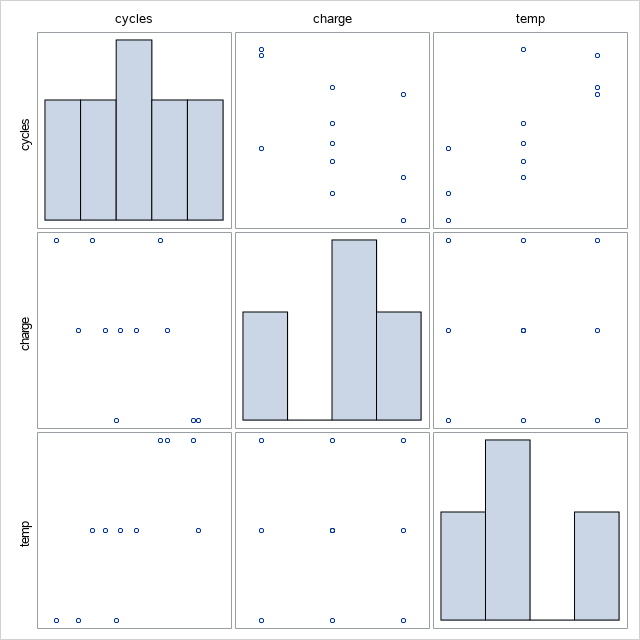

In [2]:
proc sgscatter data=power;
   matrix cycles charge temp / diagonal=(Histogram);
run;


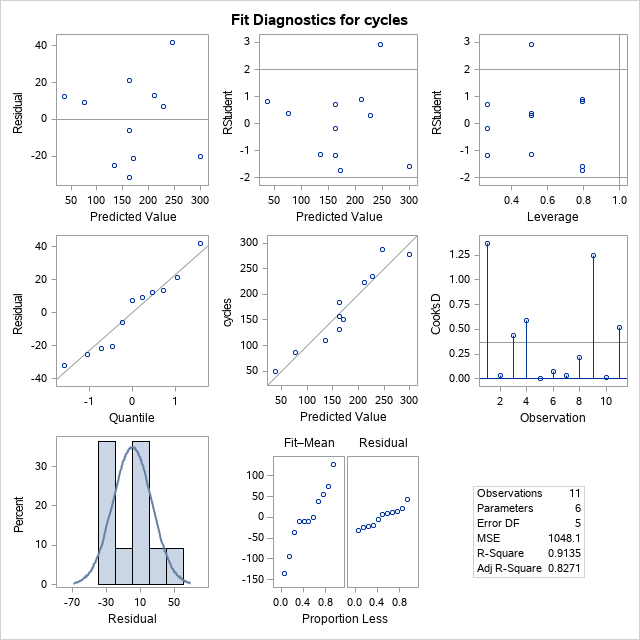
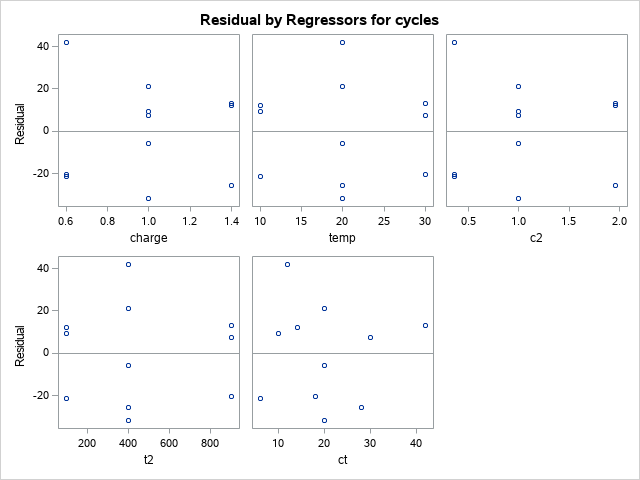

In [4]:
proc reg data= power;
 model cycles = charge temp c2 t2 ct;
 test c2=0, t2=0, ct=0;
 output out=power2order r=resid p=predicted;
run;


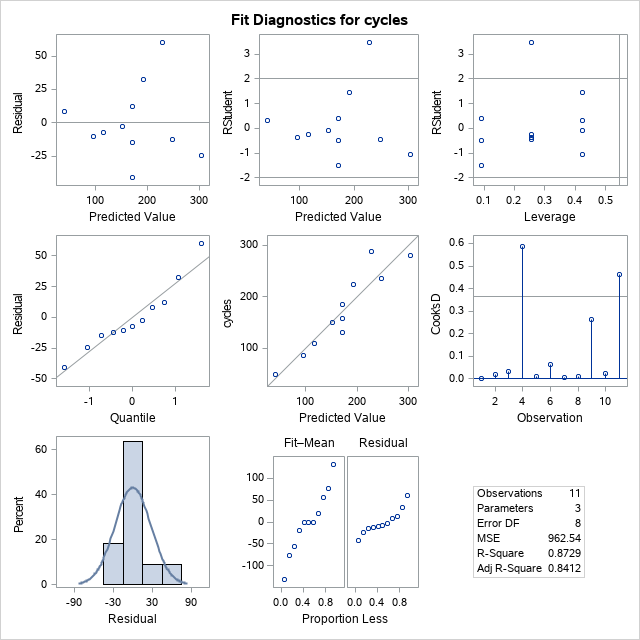
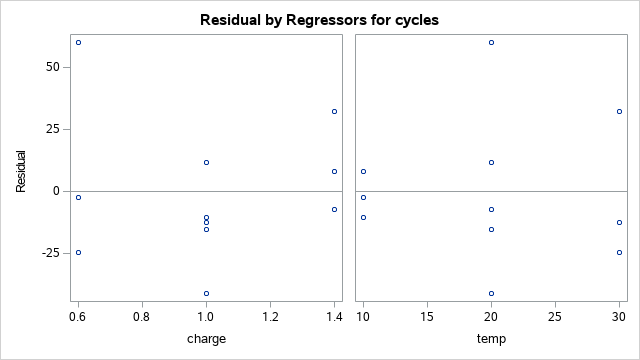

In [5]:
proc reg data= power;
 model cycles = charge temp;
 output out=power1order r=resid p=predicted;
run;


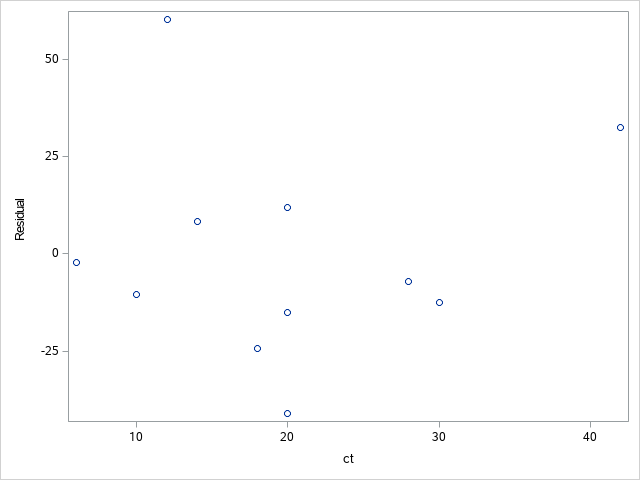

In [6]:
proc sgplot data=power1order;
  scatter y=resid x=ct;
run;

In [7]:
/* explore second order terms using a toy example */
data ex2;
input Y X1 X2;
X1_2 = X1**2;
X2_2 = X2**2;
X12 = X1*X2;
datalines;
   39.7444    0.0200    9.1636
   48.7159    0.0400   13.1856
   40.6646    0.0600    9.2236
   41.4185    0.0800   10.4576
   44.9609    0.1000   11.3992
   47.3006    0.1200   12.0987
   44.0529    0.1400   11.3608
   53.6087    0.1600   14.9024
   53.8974    0.1800   14.5825
   47.5117    0.2000   12.5043
   45.5373    0.2200   11.3484
   43.1694    0.2400    9.4634
   44.1291    0.2600   10.0702
   40.1945    0.2800    8.0957
   46.1351    0.3000   10.0738
   44.8802    0.3200    9.7967
   54.8632    0.3400   14.1572
   51.5588    0.3600   12.0776
   47.2663    0.3800   10.6182
   44.8763    0.4000    9.8202
   49.8573    0.4200   10.4893
   51.5938    0.4400   11.7744
   58.6414    0.4600   14.6346
   50.0626    0.4800   10.7340
   54.1802    0.5000   11.7266
   52.2197    0.5200   11.2790
   51.8525    0.5400   10.9504
   53.8324    0.5600   11.7653
   55.1987    0.5800   12.2024
   49.3436    0.6000    9.6940
   46.2665    0.6200    8.9000
   49.8027    0.6400    9.9046
   53.8993    0.6600   11.3680
   55.2025    0.6800   11.7303
   45.0408    0.7000    8.1375
   53.1242    0.7200   10.9721
   47.9422    0.7400    8.7286
   46.8260    0.7600    8.3267
   52.2920    0.7800   10.0078
   52.6825    0.8000   10.7157
   44.8324    0.8200    7.6380
   39.5657    0.8400    5.7088
   49.1836    0.8600    8.5334
   53.0532    0.8800    9.6686
   49.7784    0.9000    8.6584
   58.3695    0.9200   11.5758
   47.4427    0.9400    7.6891
   54.7475    0.9600    9.8712
   44.4935    0.9800    6.6421
   41.2569    1.0000    5.6166
   54.1640    1.0200    9.4078
   39.9949    1.0400    5.2214
   39.9521    1.0600    5.3381
   44.9611    1.0800    6.6622
   38.4520    1.1000    4.8286
   52.8938    1.1200    8.8567
   47.9460    1.1400    7.1193
   41.3614    1.1600    5.0215
   42.5568    1.1800    5.7674
   41.8649    1.2000    5.5070
   50.0668    1.2200    7.2730
   31.3187    1.2400    2.5237
   46.0852    1.2600    5.9014
   37.3613    1.2800    4.4449
   51.5650    1.3000    7.8250
   54.0179    1.3200    8.3013
   53.3956    1.3400    7.3376
   49.6714    1.3600    6.7798
   28.1865    1.3800    1.6526
   50.3577    1.4000    6.9190
   42.5615    1.4200    5.0510
   48.9015    1.4400    6.2140
   47.4218    1.4600    6.0315
   41.2063    1.4800    4.3123
   55.8114    1.5000    7.7315
   52.0136    1.5200    6.9940
   47.0675    1.5400    5.7563
   58.0899    1.5600    8.1863
   63.2256    1.5800    9.5031
   40.2517    1.6000    4.0751
   49.9342    1.6200    6.1849
   39.3341    1.6400    3.9614
   57.9545    1.6600    7.6306
   53.6742    1.6800    7.0760
   44.8762    1.7000    4.9883
   44.0115    1.7200    4.8521
   44.4318    1.7400    4.4119
   58.2326    1.7600    7.7188
   46.2832    1.7800    5.3192
   49.7436    1.8000    5.4660
   39.8847    1.8200    3.1988
   54.0044    1.8400    6.2913
   76.2761    1.8600   10.9975
   52.3064    1.8800    6.1476
   35.8286    1.9000    2.6744
   54.0291    1.9200    5.9658
   37.4514    1.9400    2.5534
   51.2691    1.9600    5.6752
   34.3958    1.9800    1.9455
   57.8376    2.0000    6.7241
;
run;


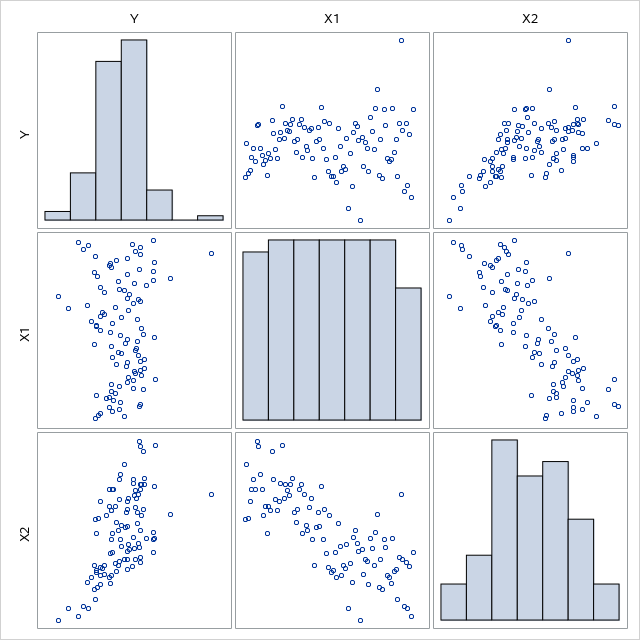

In [8]:
proc sgscatter data=ex2;
  matrix Y X1 X2 / diagnol = (histogram);
run;


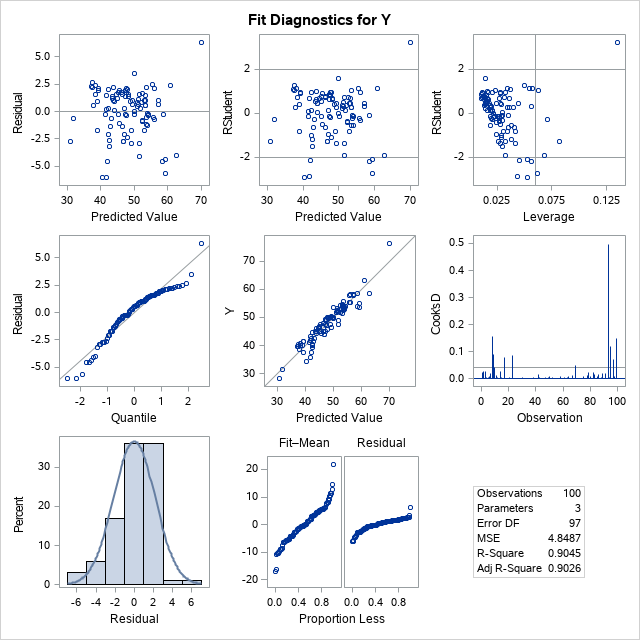
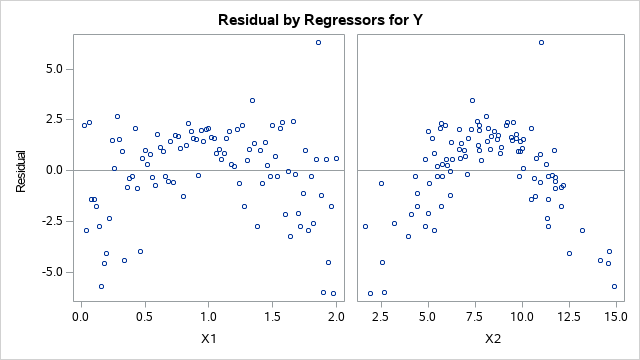

In [9]:
*start from simple model;
proc reg data=ex2;
 model Y=X1 X2;
 output out=ex1order r=resid;
run;


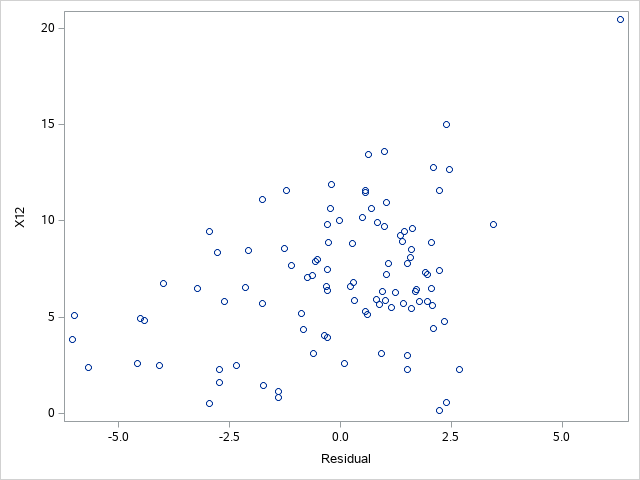

In [10]:
proc sgplot data=ex1order;
  scatter x=resid y=x12;
run;


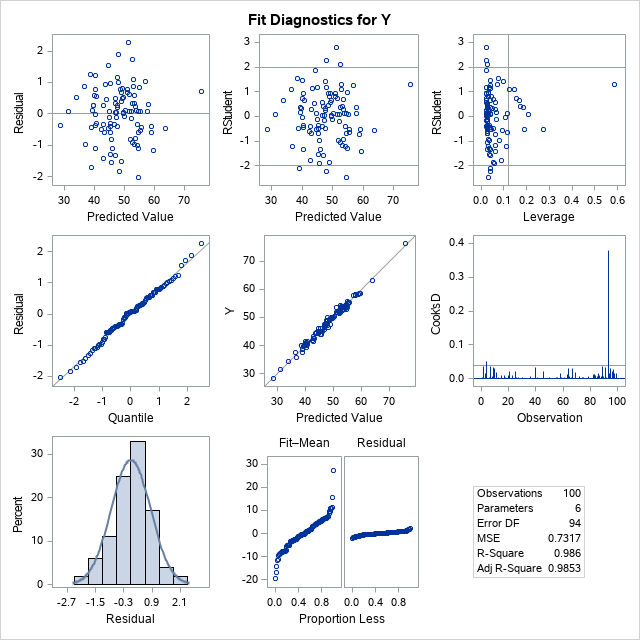
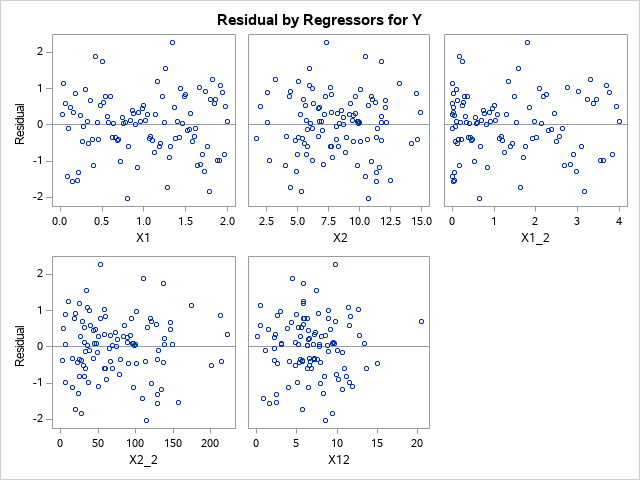

In [11]:
proc reg data=ex2;
model y= x1 x2 x1_2 x2_2 x12;
run;


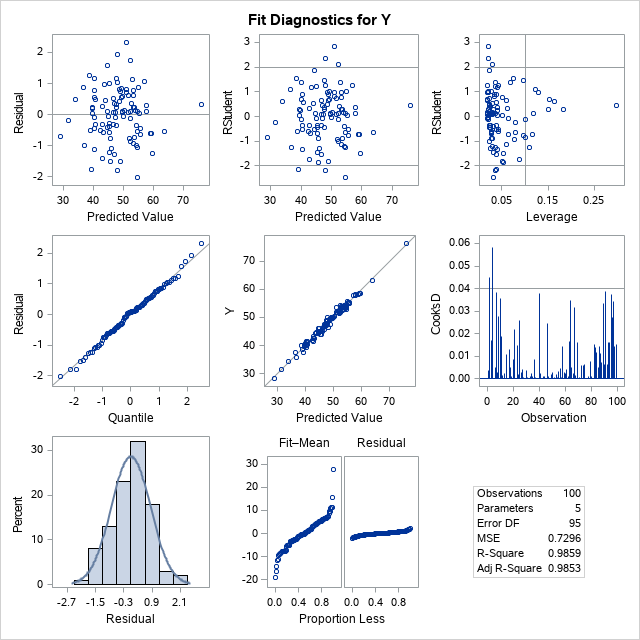
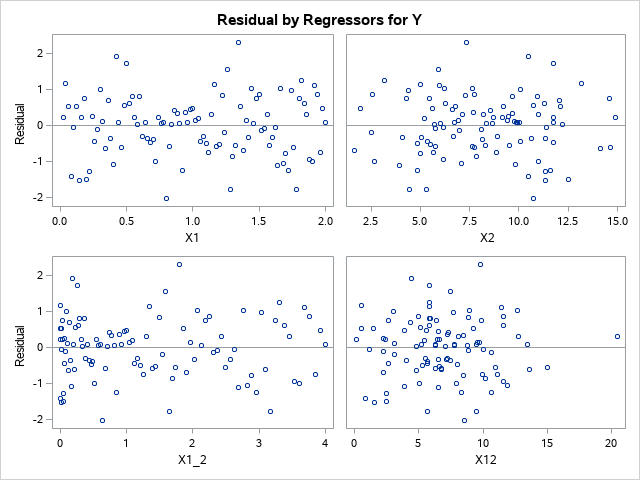

In [12]:
proc reg data=ex2;
model y=x1 x2 x1_2 x12 ; *drop x2_2 (not significant);
run;

In [13]:
/* qualitative predictors */
data insurance;
input months size type $;
x2 = 0;
if type="STOCK" then x2=1;
x1x2=size*x2;
datalines;
17 151 MUTUAL
26 92 MUTUAL
21 175 MUTUAL
30 31 MUTUAL
22 101 MUTUAL
0 277 MUTUAL
12 210 MUTUAL
19 120 MUTUAL
4 290 MUTUAL
16 238 MUTUAL
28 164 STOCK
15 272 STOCK
11 295 STOCK
38 68 STOCK
31 85 STOCK
21 224 STOCK
20 166 STOCK
13 305 STOCK
30 124 STOCK
14 246 STOCK
;
run;


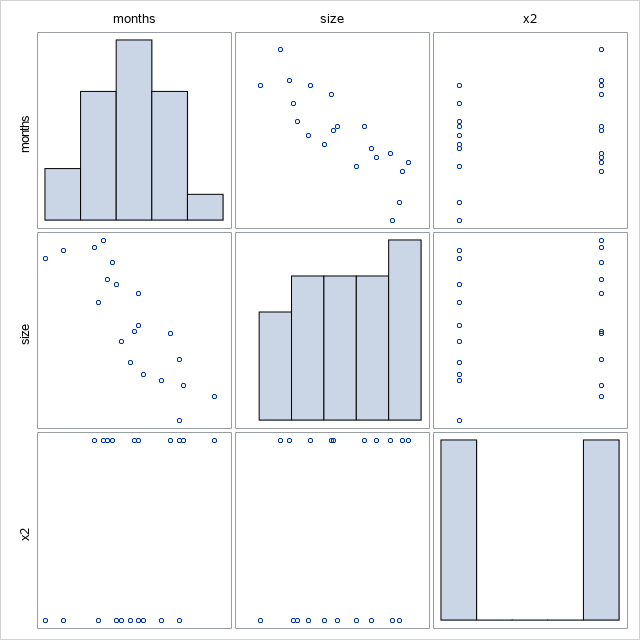

In [14]:
proc sgscatter data=insurance;
  matrix months size x2 /diagonal = (Histogram);
run;


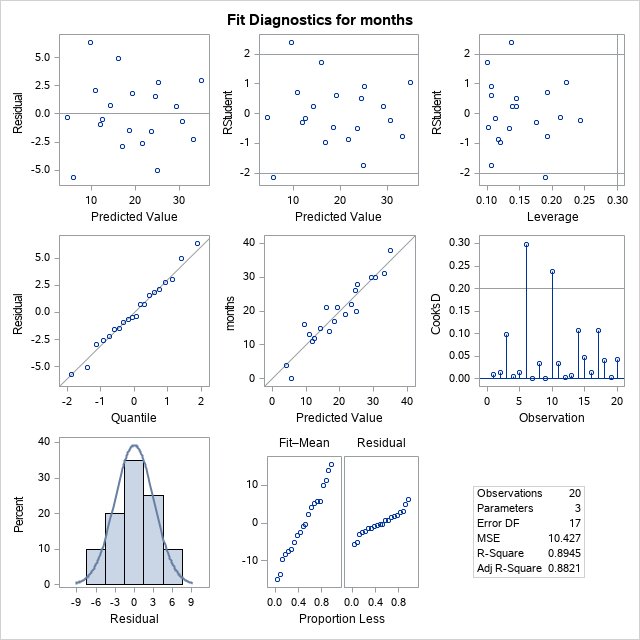
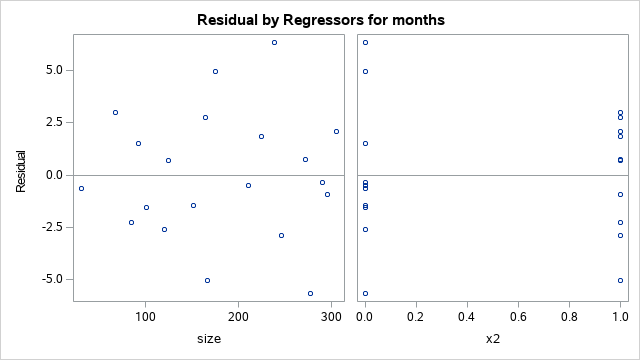

In [15]:
proc reg data= insurance;
  model months=size x2/clb;
run;


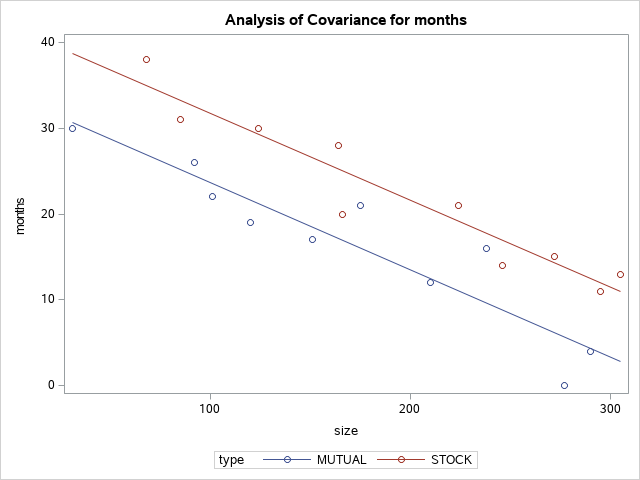

In [17]:
proc glm data=insurance;
 class type;
 model months=size type/solution clparm;
run;


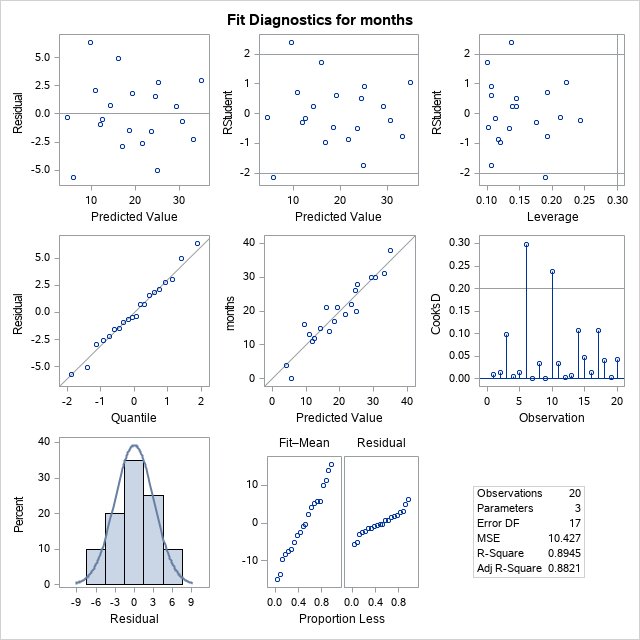
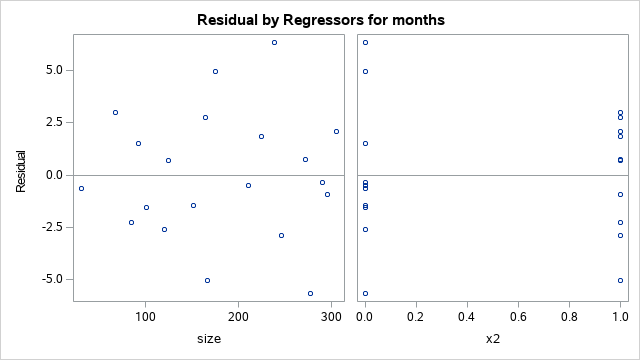

In [18]:
proc reg data=insurance;
model months = size x2 / clb ;
output out=simpout r=resid;
run;


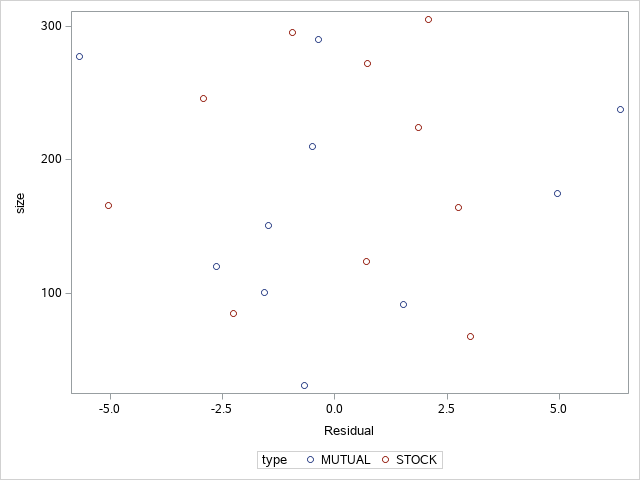

In [23]:
proc sgplot data=simpout;
    scatter x=resid y=size/ group=type;
run;


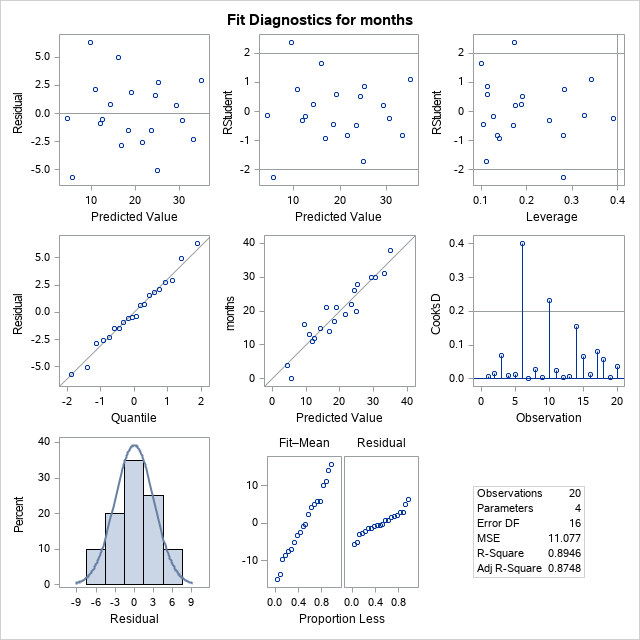
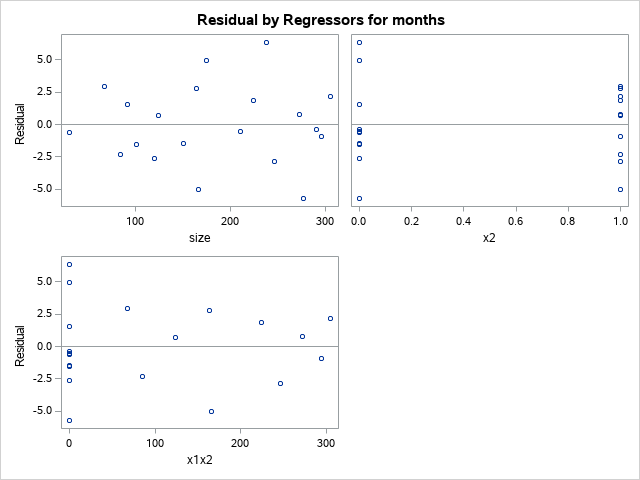

In [24]:
proc reg data=insurance;
model months = size x2 x1x2 / clb;
run;



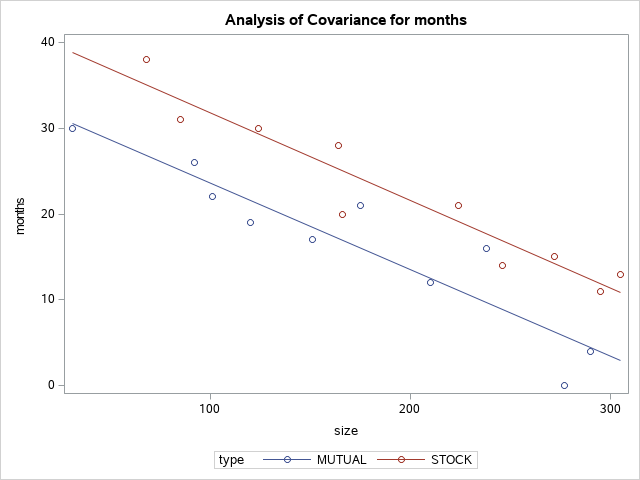

In [25]:
proc glm data=insurance;
class type;
model months = size type size*type / solution clparm;
run;

In [26]:
/* cancer example */

data cancer;
input survive age weight test income;
pet = (test=0);
mri = (test=1);
noimg=(test=2);
a_w = age*weight;
a_i = age*income;
w_i = weight*income;
datalines;
    27.9493   57.5374  123.5473    1.0000    6.3304
   27.0600   58.5426  116.1253    1.0000    5.4062
   21.2435   48.3099  157.5900         0    5.0409
   14.4828   59.7799  180.3722    1.0000    5.5490
   13.5877   66.1828  178.0449    1.0000    4.1369
    9.0619   78.6586  178.7204    1.0000    5.2869
   19.7453   60.8187  129.8686         0    3.6789
   10.3594   76.0799  144.5539         0    6.9675
   22.0837   56.1933  132.7354    1.0000    5.0359
   19.7676   47.0041  134.9641    2.0000    6.2331
   18.4210   52.7604  126.7797    2.0000    7.4576
   21.1232   54.3502  131.2984         0    4.6404
   16.9113   66.2166  153.7217         0    5.1650
   19.0713   46.6453  143.9033    2.0000    4.9112
   24.3964   58.7689  109.0669         0    5.1883
   26.6829   48.9719  140.2001    1.0000    6.4664
   11.9277   32.4682  185.2870    2.0000    3.5970
   24.9660   62.5202  133.9787    1.0000    6.6082
   16.2408   51.4185  143.9777    2.0000    6.2155
   23.7683   71.3536   95.4794         0    5.6865
   24.5751   57.0209  119.7526         0    6.1267
   11.5861   71.5433  126.3209    2.0000    5.1453
   20.1184   70.4608  138.6833    1.0000    6.8471
    6.4443   81.2687  151.9010    2.0000    5.6183
   21.6322   53.4423  104.7583    2.0000    4.9174
   20.3541   48.5763  128.8825    2.0000    5.1310
   19.7867   69.4904  121.6278    1.0000    6.9378
   23.4781   55.9539  120.8586         0    5.5674
   17.7517   56.1567  142.0545         0    5.2720
   12.9124   64.8202  162.3082         0    5.9865
   19.2809   64.4377  143.7384    1.0000    5.4144
   13.2773   63.8110  147.5540    2.0000    5.8725
   15.2017   71.0235  156.3630    1.0000    5.3462
    7.9441   68.5645  153.6088    2.0000    6.0153
   31.1947   48.2149  109.9878    1.0000    6.8576
   19.5529   64.0197  134.5590    1.0000    5.0873
   23.0525   54.1577  137.5564    1.0000    6.1637
   19.5896   50.2051  180.7544    1.0000    5.0847
   11.8944   61.1511  152.1324    2.0000    5.1537
   18.3686   60.6847  136.4475         0    5.4388
   20.4072   54.7010  141.8731         0    5.2291
   23.8406   65.4111   95.8853         0    4.9170
   19.1136   66.8172   90.6914    2.0000    4.0885
   21.6255   65.3856  127.9528    1.0000    4.4336
   11.6367   54.8996  159.4280    2.0000    6.0554
   25.1175   46.7789  145.5839    1.0000    6.9825
   27.5741   53.8934  131.5757    1.0000    4.2601
   21.6043   54.3469  134.3222         0    5.0158
   15.3492   60.8617  171.7538    1.0000    6.2854
    9.9455   66.9150  159.8059    2.0000    5.4050
   17.7203   81.3375  128.2400    1.0000    6.6957
   22.0490   59.9714  128.7740         0    4.7456
   22.6318   59.1048  136.5786    1.0000    5.0903
   12.7415   57.4502  143.2343    2.0000    3.7290
   23.2938   51.2579  111.7627    2.0000    4.4926
   22.0673   64.2293   83.0172    2.0000    6.6885
   17.5377   58.6660  124.8345    2.0000    5.8015
   12.9947   65.3958  176.9711    1.0000    5.0249
   22.2207   68.7517  123.4911    1.0000    5.8060
   13.5922   47.4922  162.2680    2.0000    4.8703
   12.5945   68.6831  157.7011         0    6.0338
   12.9819   51.9519  149.1198    2.0000    3.6897
   23.8871   52.4731  132.6934    1.0000    6.5960
   27.7835   52.5419  134.4080    1.0000    5.6362
   27.6501   56.9035  115.9425         0    6.0844
   29.8881   44.7811  115.2770    1.0000    4.8486
   10.1812   68.2653  146.9431    2.0000    4.2543
   21.6669   53.8701  151.4884    1.0000    4.2190
   12.2994   69.5973  174.3633    1.0000    3.5647
   20.4687   79.7299  123.7062    1.0000    5.6361
   20.5084   62.9496  146.1394    1.0000    3.9967
   10.2097   56.0735  163.9863    2.0000    6.6836
   11.9429   65.7593  175.7199    1.0000    4.9206
   29.1604   48.5858  120.8252    1.0000    6.7577
   27.5212   60.6107  105.9017    1.0000    5.4454
   13.6631   60.1232  130.9488    2.0000    4.4736
   22.4660   58.3188  144.3580    1.0000    5.6088
   26.0434   53.1265  128.8577    1.0000    7.0826
   24.8928   50.0935  150.6224    1.0000    5.1039
   27.0892   59.5024  108.1284    1.0000    5.1880
    9.8363   67.1930  156.7304    2.0000    5.8969
   19.1925   57.1694  153.6014    1.0000    5.9933
   17.9906   45.7503  144.3588    2.0000    5.0696
   18.7999   64.6155  158.8992    1.0000    6.1033
   16.7333   70.9148  146.2879         0    4.7841
   17.0189   49.5571  143.6355    2.0000    5.3511
   33.9602   31.5722  108.0609    2.0000    6.6436
   14.4641   69.9682  117.5218    2.0000    6.4411
   21.5193   60.7653  107.4853    2.0000    6.9885
   34.6908   41.3326  106.8562    1.0000    6.1195
   21.2507   53.8639  136.8486         0    6.2807
   22.1361   71.6935  130.7011    1.0000    4.8393
   25.9873   54.2499  128.9728    1.0000    5.9176
   18.3791   57.3521  147.0465         0    6.0821
   22.1354   60.0472  135.7401    1.0000    5.3436
   15.7300   59.6059  134.6879    2.0000    7.0597
   15.1699   54.9461  143.5409    2.0000    6.9019
   20.8661   48.4217  125.0760    2.0000    5.1371
   15.7782   67.1043  114.9531    2.0000    4.3758
   16.3500   67.2817  134.0912         0    3.9311
   21.1969   68.6688  125.5184    1.0000    5.6405
    7.7148   84.3157  165.9221    1.0000    4.6322
   20.2396   61.1020  130.4590         0    4.8449
   25.7945   60.2645  116.7282    1.0000    6.6947
   17.8172   69.7032  132.0984         0    4.6037
   18.3516   59.9474  166.9776    1.0000    5.8258
    3.9773   74.0954  164.5478    2.0000    4.8820
   10.4650   77.5785  115.0457    2.0000    4.2676
   14.8451   68.8501  136.8381    2.0000    6.6454
   14.5626   71.4086  139.7809    2.0000    6.3674
   15.3347   64.0322  177.6971    1.0000    6.2091
   20.0509   61.9101  140.8987    1.0000    5.6706
   11.2860   53.0637  172.8401    2.0000    5.4425
   20.7029   60.1104  132.7340         0    5.5107
   16.5930   48.9441  129.8182    2.0000    6.2902
    4.6888   79.0797  162.4446    2.0000    5.4980
   23.1688   58.3459  133.5861    1.0000    4.7511
   24.4294   52.6757  128.1122         0    4.7014
   21.2401   50.0926  120.2364    2.0000    6.9648
   15.1160   68.9431  130.2479    1.0000    5.6154
   13.2193   64.4823  127.0450    2.0000    3.8766
   13.0010   68.8922  161.8827    1.0000    4.9880
   12.9113   70.7334  118.8996    2.0000    5.1542
   17.0585   58.9527  138.1565         0    6.0317
   17.1725   75.4732  134.0844    1.0000    6.9959
   27.8853   61.6983   78.4327         0    6.8588
   10.1163   68.0405  154.1330    2.0000    5.4362
   23.9143   42.7597  151.8030    1.0000    5.2529
   16.6885   61.7413  127.2886    2.0000    5.9853
   28.5840   55.1592   85.2357         0    6.1855
   25.4990   52.6837  116.5968    1.0000    5.9058
   25.9970   38.6810  145.5511    1.0000    5.5630
   26.6170   41.8963  149.4296    1.0000    4.7888
   26.3595   59.4766  124.1311    1.0000    4.7049
   18.0475   59.1379  157.0029    1.0000    5.4420
   27.4433   48.1026  129.1480         0    4.8146
   17.3578   52.4586  135.0602    2.0000    4.3917
   16.4584   69.4728  108.2848    2.0000    5.6955
    9.7524   58.1737  165.8578    2.0000    3.8983
   13.9732   59.3373  137.6528    2.0000    5.5484
   18.0985   69.0502  100.4838    2.0000    6.4386
   24.3917   74.5822   82.0061         0    5.4664
   22.5041   48.8202  139.9859         0    4.7434
   12.1663   78.1329  137.2652    1.0000    4.9101
   24.1952   61.5075  141.3138    1.0000    5.4635
   21.0699   57.1701  126.5156         0    5.1739
   17.4565   76.5012  135.0996         0    4.4904
   20.0235   66.6638  131.0847         0    6.3130
   19.5185   56.5364  135.9413    1.0000    6.4951
   20.2838   57.3596  152.5932    1.0000    5.2988
   16.3448   53.5565  141.6646    2.0000    6.2678
   29.5585   50.9446  119.8806    1.0000    5.2942
   20.5313   67.1668  123.1774         0    7.0008
   18.6875   59.9266  162.1678    1.0000    4.4614
   40.6400   31.8520   95.3868    1.0000    4.4035
   21.0495   58.5045  135.6402         0    6.4085
   15.7036   65.7749  134.7022    2.0000    6.2631
   15.0749   67.5312  124.4683    2.0000    5.5795
   26.7567   58.3302  112.8916    1.0000    6.3358
   21.6492   54.1818  136.9006         0    7.2294
   13.2412   63.6576  144.0869    2.0000    4.9620
   18.1838   54.5108  168.7187    1.0000    4.6479
   13.4476   65.7874  126.0596    2.0000    7.8155
   28.4767   40.4420  117.4198         0    4.9778
   21.2673   65.2201  135.0294    1.0000    3.1479
   16.8396   76.0114  147.1087    1.0000    5.9689
   24.5304   67.3256  105.1900         0    4.4160
   12.3294   65.5575  148.3034    2.0000    5.2207
   13.2251   51.8665  153.5013    2.0000    4.7558
   25.8122   54.6103  133.6609    1.0000    5.2131
    9.3176   73.0788  134.3601    2.0000    6.3192
   20.4246   55.1742  140.7469         0    6.1195
   21.2855   42.4755  122.5241    2.0000    4.9323
   20.3040   50.7343  134.0080    2.0000    4.3048
   17.7728   69.2244  149.6903    1.0000    7.6090
   24.8696   60.4100  128.9228    1.0000    5.8031
   17.1092   64.1365  113.7088    2.0000    4.0035
   16.3819   65.9724  162.7518    1.0000    6.0804
   10.8880   79.2427  142.7722         0    5.5901
   14.6570   67.1412  156.5191    1.0000    5.2500
   23.9569   36.8766  145.8305         0    6.0522
   23.4362   73.8072  117.5634    1.0000    4.9099
   13.4031   73.9070  167.3182    1.0000    5.3167
   23.6646   55.4610  134.5288    1.0000    3.8862
   26.5541   53.7170  120.3745    1.0000    5.6367
   17.6557   70.2322  119.0870         0    5.3516
   23.9410   55.1089  133.2566         0    2.8797
   23.2017   55.9760  146.9725    1.0000    2.9478
   14.9455   73.9968  142.3063         0    6.2328
   24.2806   62.8056  123.4117    1.0000    4.7311
   16.9592   78.8087  127.1401         0    5.3318
   22.9732   52.0033  156.2437    1.0000    4.3393
   29.0257   54.3930  121.6937    1.0000    5.3804
   16.4145   77.0887  128.3487    1.0000    4.4991
   17.4130   53.5519  169.5189    1.0000    6.9788
   27.5796   45.7750  103.8380    2.0000    6.2304
   25.7265   52.4406  140.2642    1.0000    3.3389
   25.8898   61.5752  122.1842    1.0000    6.9586
   18.3441   63.7835  138.8740         0    5.3416
   18.0540   61.7866  159.8402    1.0000    5.8098
  ;
run;



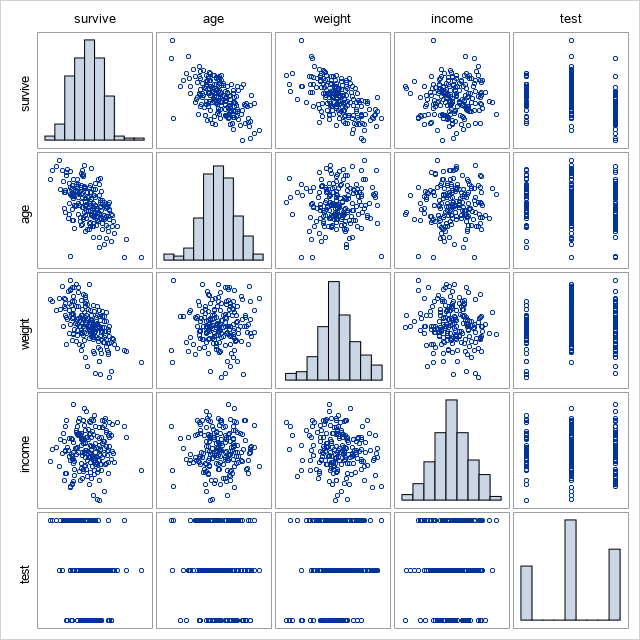

In [27]:
proc SGSCATTER data=cancer;
matrix survive age weight income test/Diagonal = (Histogram);
run;


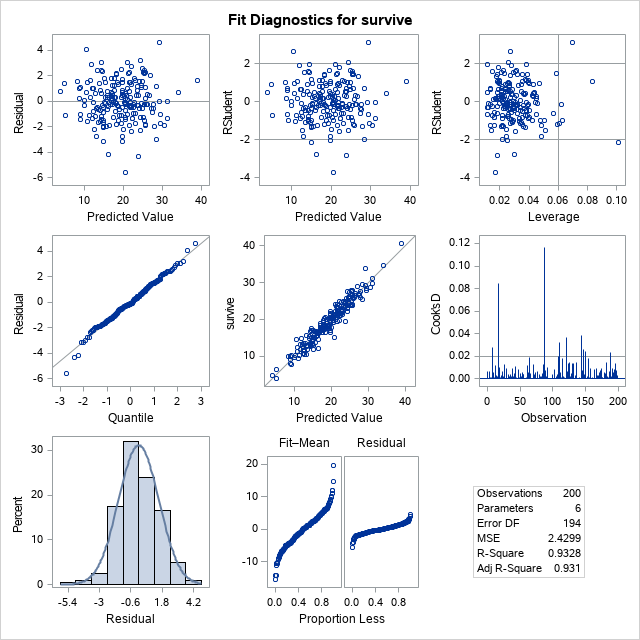
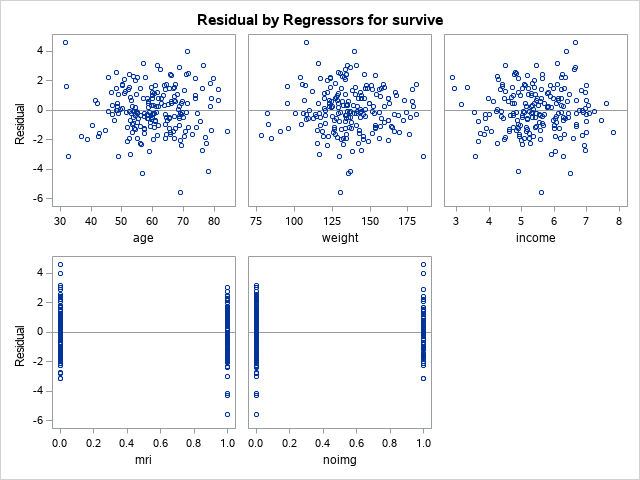

In [28]:
proc reg data=cancer;
var a_w a_i w_i;
model survive = age weight income mri noimg;
output out=CanOut r=resid;
run;


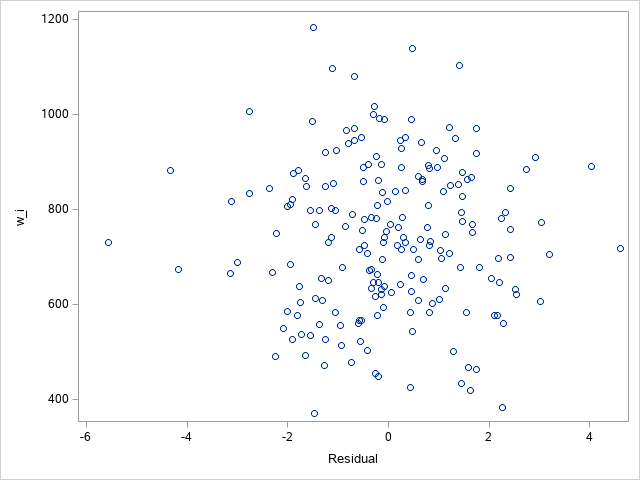

In [31]:
proc sgplot data=Canout;
  scatter x=resid y=w_i; *a_i a_w;
  run;


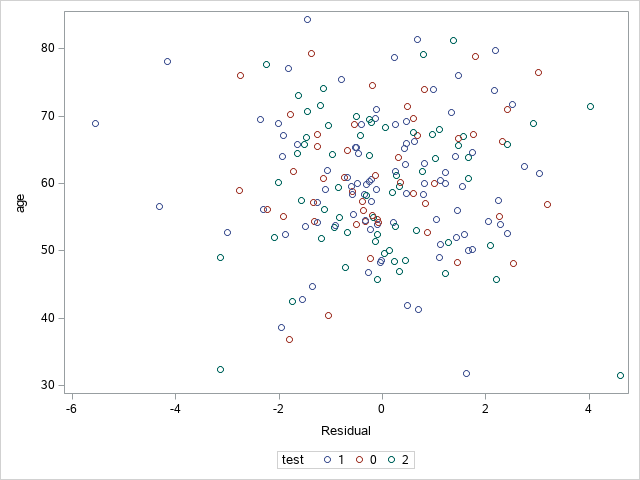

In [38]:
proc sgplot data=CanOut;
scatter x=resid y=age/group=test; *y=weight,income;
run;


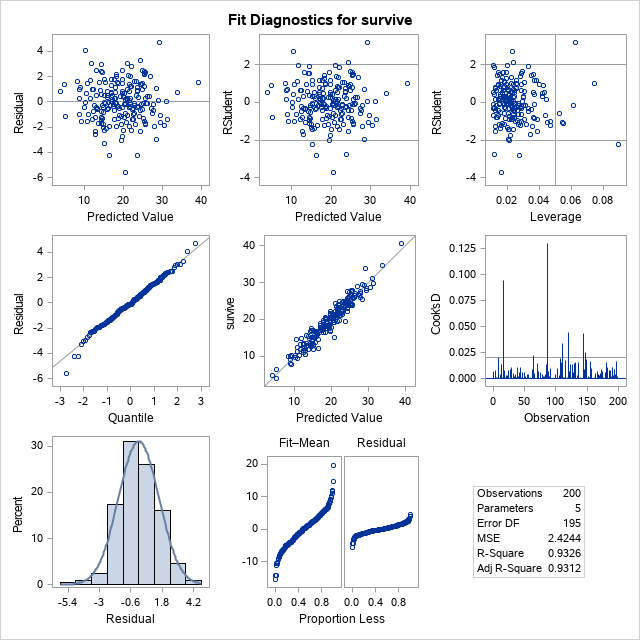
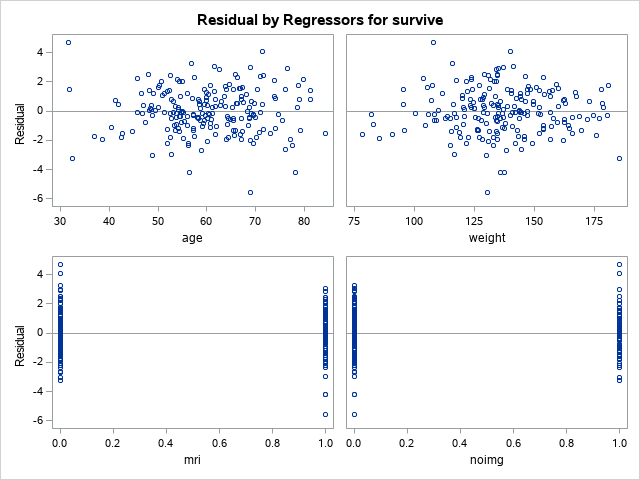

In [39]:
proc reg data=cancer;
var a_w;
model survive = age weight  mri noimg;
output out=CanOut r=resid;
run;


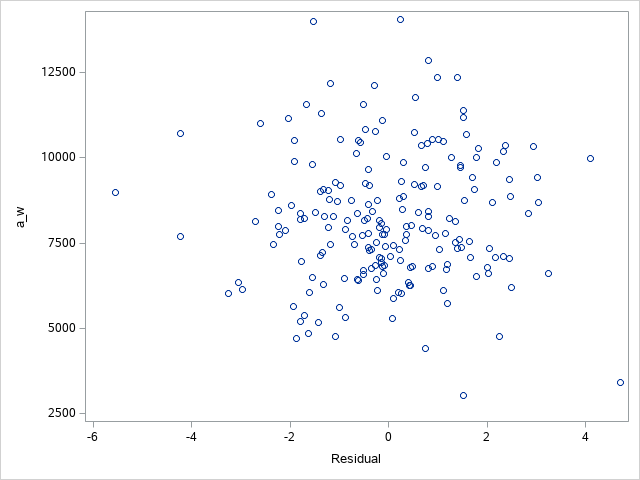

In [40]:
proc sgplot data=Canout;
scatter x=resid y=a_w;
run;


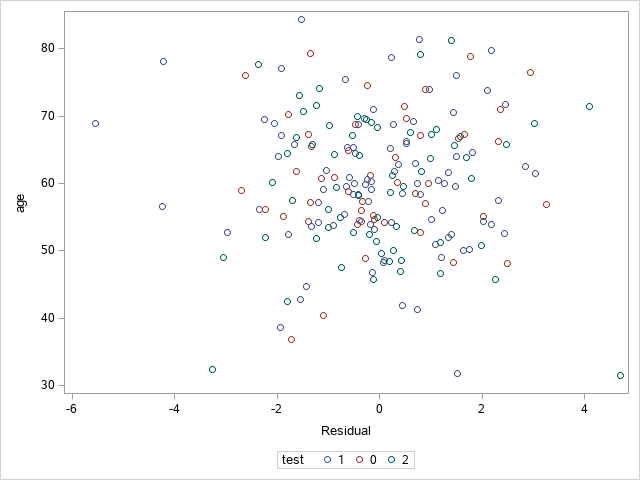

In [43]:
proc sgplot data=Canout;
scatter x=resid y=age / group=test; *y=weight;
run;